See:<br>
https://github.com/Avik-Jain/100-Days-Of-ML-Code/blob/master/Code/Day%206%20Logistic%20Regression.md<br>


# Logistic regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [7]:
y_pred = classifier.predict(X_test)

In [8]:
df = pd.DataFrame(list(zip(y_test, y_pred)), columns =['y_test', 'y_pred']) 
df.loc[df['y_test'] != df['y_pred']]

,y_test,y_pred
9,0,1
31,1,0
55,1,0
58,1,0
63,1,0
73,1,0
76,0,1
81,0,1
88,1,0
95,1,0


true negatives, false negatives<br>
false positives, truepositives

In [9]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 8, 24]])

In [10]:
f1_score(y_test, y_pred, average=None)

array([0.92198582, 0.81355932])

# Visualisation

Trying to replicate this image:<br>
![Training the model](https://github.com/Avik-Jain/100-Days-Of-ML-Code/raw/master/Other%20Docs/training.png)

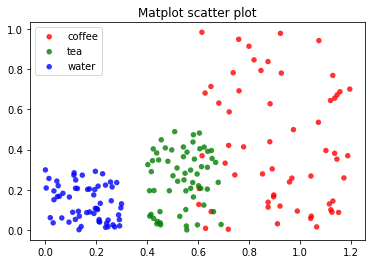

In [11]:
# source: https://pythonspot.com/matplotlib-scatterplot/

# Example multiple scatter plot
# Create data
N = 60
g1 = (0.6 + 0.6 * np.random.rand(N), np.random.rand(N))
g2 = (0.4+0.3 * np.random.rand(N), 0.5*np.random.rand(N))
g3 = (0.3*np.random.rand(N),0.3*np.random.rand(N))

data = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("coffee", "tea", "water")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()

In [12]:
# Create dataframe from X_train and y_train
df_train=pd.DataFrame(X_train)
df_train["2"]=y_train
df_train_zero = df_train.loc[df_train['2'] == 0]
del df_train_zero['2']
df_train_one = df_train.loc[df_train['2'] == 1] 
del df_train_one['2']

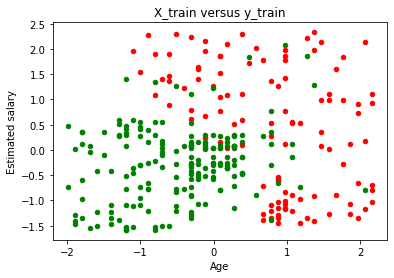

In [13]:
# See https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
# gca stands for 'get current axis'
ax = plt.gca()

df_train_one.plot(kind='scatter',x=0,y=1,color='red',ax=ax)
df_train_zero.plot(kind='scatter',x=0,y=1,color='green',ax=ax)
plt.title('X_train versus y_train')
plt.xlabel('Age')
plt.ylabel('Estimated salary')


plt.show()

In [14]:
# Create dataframe from X_train and y_predict
df_train=pd.DataFrame(X_train)
df_train["2"]=classifier.predict(X_train)
df_train_zero = df_train.loc[df_train['2'] == 0]
del df_train_zero['2']
df_train_one = df_train.loc[df_train['2'] == 1] 
del df_train_one['2']

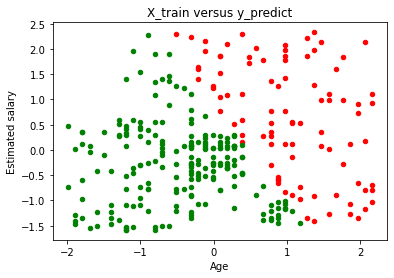

In [18]:
ax = plt.gca()
df_train_one.plot(kind='scatter',x=0,y=1,color='red',ax=ax)
df_train_zero.plot(kind='scatter',x=0,y=1,color='green',ax=ax)
plt.title('X_train versus y_predict')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.show()

In [24]:
# Create dataframe from X_test and y_predict
df_test=pd.DataFrame(X_test)
df_test['2']=classifier.predict(X_test)
df_test_zero = df_test.loc[df_test['2'] == 0]
del df_test_zero['2']
df_test_one = df_test.loc[df_test['2'] == 1] 
del df_test_one['2']

df_ytest=pd.DataFrame(X_test)
df_ytest['2']=y_test
df_ytest_zero = df_ytest.loc[df_ytest['2'] == 0]
del df_ytest_zero['2']
df_ytest_one = df_ytest.loc[df_test['2'] == 1] 
del df_ytest_one['2']

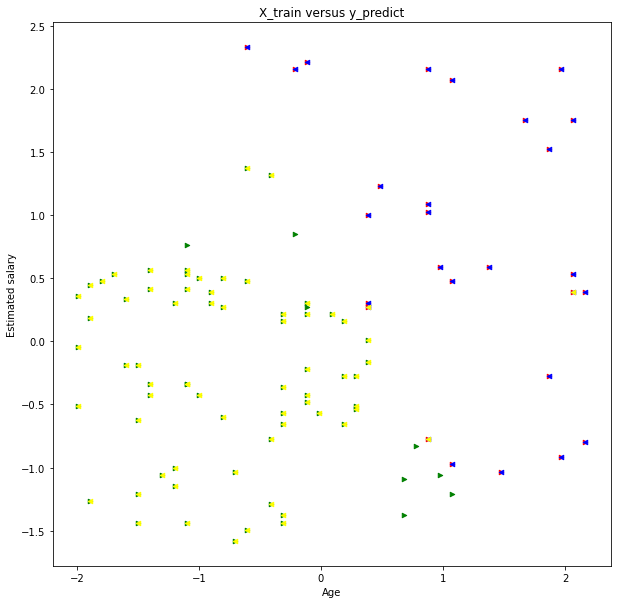

In [37]:
plt.figure(figsize=(10,10))
ax = plt.gca()
df_test_one.plot(kind='scatter', marker='>', x=0,y=1,color='red',ax=ax)
df_test_zero.plot(kind='scatter', marker='>', x=0,y=1,color='green',ax=ax)
df_ytest_one.plot(kind='scatter', marker='<', x=0,y=1,color='blue',ax=ax)
df_ytest_zero.plot(kind='scatter',marker='<', x=0,y=1,color='yellow',ax=ax)
plt.title('X_train versus y_predict')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.show()

# You can see the three false negatives and eight false positives

https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

Later I found the code for the graph in the support vector machine example